# Simulation Methods Project

Adapted from Maciej Workiewicz

Authors:
* Pauline Engel
* Sebastian Erhardt
* Saskia Hasreiter
* Leo Schwarze
* Felix Siegel


In [218]:
import os
from time import time
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools

In [219]:
N = 5  # number of detailed decisions per lower level landscape   |
AMOUNT_OF_ITERATIONS = 1000  # we will generate 1000 NK landscapes to begin with     |

In [220]:
K = 3

In [221]:
power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape

## Interaction Matrix

In [222]:
def generate_random_interaction_matrix():
    '''
    This function takes the number of N elements and K interdependencies
    and creates a random N x N interaction matrix.
    All elements on the diagonal [0,0],[1,1],...[N-1,N-1] will be 1s.
    Based on the K, there will be additional K 1 in each row in addition to the diagonal.
    '''
    Int_matrix_rand = np.zeros((N, N)) # generate a N x N Matrix
    for aa1 in np.arange(N): # iterate over the indexes from 0,1,... to N
        Indexes_1 = list(range(N)) # generate a list from 0,1,... to N
        Indexes_1.remove(aa1)  # remove aa1 index e.g. remove 2 from the list
        np.random.shuffle(Indexes_1) # shuffle the indexes
        Indexes_1.append(aa1) # add the removed index again at the end
        Chosen_ones = Indexes_1[-(K+1):]  # extract the last K indexes in the shuffled 
        for aa2 in Chosen_ones: # iterate over the extracted indexes
            Int_matrix_rand[aa1, aa2] = 1  # set the poistion to 1 in the result matrix
    return(Int_matrix_rand)

## Fitness Calculation

In [224]:
def calculate_fitness_vector(landscape, interaction_matrix, position, power_key):
    '''
    Takes the landscape, an interaction matrix and a given combination and returns a vector of fitness
    values for the vector of the N decision variables.
    '''
    result = np.zeros(N) # initialize the fitness vector with length N and 0
    for y in np.arange(N):
        x = np.sum(position * interaction_matrix[y] * power_key)
        result[y] = landscape[x, y]
    return(result)

## Calc Values for Landscapes

In [225]:
def generate_landscape():
    """
    Calculates values for all positions on the landscape. The resulting
    array contains:
    - the first columns indexed from 0 to N-1 are for each of the combinations
    - columns indexed from N to 2*N-1 are for the fit value (vector) of those combinations
    - the column indexed 2N is for the total fit (average of the entire vector)
    - column indexed 2N+1 is a dummy, with 1 indicating a local peak
    - the last column is a dummy, with 1 indicating the global peak
    """
    # generate a random interaction matrix
    interaction_matrix = generate_random_interaction_matrix().astype(int)
    # generate a random 2^N x N matrix
    # in every cell there is a random value between 0 and 1
    random_landscape = np.random.rand(2**N, N)  # this is a table of random U(0,1) numbers
    
    # inizialize a result matrix 
    # with the dimensions 2^N and N*2+3
    # the + 3 store the:
    # - the mean of the fitness vector
    # - if the position is a lokal peak
    # - if the position is a global peak
    result = np.zeros((2**N, N*2+3))  # to capture the results
    position_counter = 0  # starting counter for location
    
    # iterate over all possible representations of a list of the lenth of N
    # filled with 0s and 1s
    # starting with [0,0,0,0,..]
    # ending with [1,1,1,1,..]
    # so in the end there are 2^N combinations
    # imagine these combination as the position in the landscape
    for i in range(2**N):
        position = np.array(list(np.binary_repr(i).zfill(N))).astype(int) # taking each position
        
        # now calculate the fitness vector
        fit_1 = calculate_fitness_vector(random_landscape, interaction_matrix, position, power_key)
        
        result[position_counter, :N] = position  # store the position in the matrix
        result[position_counter, N:2*N] = fit_1
        result[position_counter, 2*N] = np.mean(fit_1)
        position_counter = position_counter + 1
    

    # look for the peaks    
    for c3 in np.arange(2**N):  # now let's see if it is a local peak
        loc_p = 1  # first, assume it is
        for c4 in np.arange(N):  # check the local neighbourhood
            new_comb = result[c3, :N].copy().astype(int)
            new_comb[c4] = abs(new_comb[c4] - 1)
            if ((result[c3, 2*N] <
                 result[np.sum(new_comb*power_key), 2*N])):
                loc_p = 0  # if smaller than the neighbour, then it is not peak
        result[c3, 2*N+1] = loc_p
    
    # store the global peak
    max_ind = np.argmax(result[:, 2*N]) # get the max result from the local peaks
    result[max_ind, 2*N+2] = 1 # set the global peak to 1
    return(result)

## Generate Landscapes

In [231]:
# init empty Landscape_data tensor
# Iterations
# Landscape
# Results
Landscape_data = np.zeros((AMOUNT_OF_ITERATIONS, 2**N, N*2+3))  # we prepare an array to receive the data

# iterate based on AMOUNT_OF_ITERATIONS
# generate a landscape each time
for iteration in np.arange(AMOUNT_OF_ITERATIONS):
    Landscape_data[iteration] = generate_landscape()

## Statistics

Summary statistics for IMatrix: K=3
average number of peaks: 3.6774193548387095
maximum number of peaks: 6.0
minimum number of peaks: 1.0
average maximum value: 0.7666891155505058
average minimum value: 0.257256353004997


Text(0, 0.5, 'frequency')

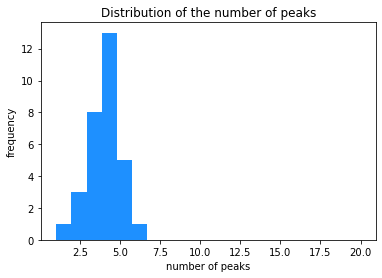

In [228]:
number_of_peaks = np.zeros(i)
max_values = np.zeros(i)
min_values = np.zeros(i)

for i_2 in np.arange(i):
    number_of_peaks[i_2] = np.sum(Landscape_data[i_2, :, 2*N+1])
    max_values[i_2] = np.max(Landscape_data[i_2, :, 2*N])
    min_values[i_2] = np.min(Landscape_data[i_2, :, 2*N])

# Let's print some summary statistics of our sample of NK landscapes
print('Summary statistics for IMatrix: K=' + str(K))
print('average number of peaks: ' + str(np.mean(number_of_peaks)))
print('maximum number of peaks: ' + str(np.max(number_of_peaks)))
print('minimum number of peaks: ' + str(np.min(number_of_peaks)))
print('average maximum value: ' + str(np.mean(max_values)))
print('average minimum value: ' + str(np.mean(min_values)))

# plot histogram of the number of local peaks in our sample
plt.hist(number_of_peaks, bins=20, range=(1, 20), color='dodgerblue')
plt.title('Distribution of the number of peaks', size=12)
plt.xlabel('number of peaks', size=10)
plt.ylabel('frequency', size=10)

## Search

In [229]:
t = 50  # time periods 
p_jump = 0 # probability of a long jump in a given round

Final fitness level for long jumps: 0.8574446013486858


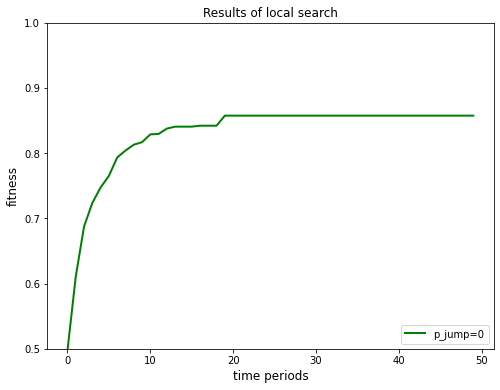

In [230]:
# *** 2. LOCAL SEARCH WITH LONG JUMPS ***************************************

Output2 = np.zeros((i, t))

for i1 in np.arange(i):
    combination = np.random.binomial(1, 0.5, N)  # gen initial combination
    row = np.sum(combination*power_key)  # finding the address in the array
    fitness = Landscape_data[i1, row, 2*N]  # piggyback on work done previously
    max_fit = np.max(Landscape_data[i1, :, 2*N])  # we will use it for normalization
    min_fit = np.min(Landscape_data[i1, :, 2*N])  # ditto
    fitness_norm = (fitness - min_fit)/(max_fit - min_fit)  # normalize 0 to 1
    for t1 in np.arange(t):  # time for local search
        Output2[i1, t1] = fitness_norm
        if np.random.rand() < p_jump:  # check whether we are doing a jump
            new_combination = np.random.binomial(1, 0.5, N)
        else:  # if not, then we simply search locally
            new_combination = combination.copy()
            choice_var = np.random.randint(N)
            new_combination[choice_var] = abs(new_combination[choice_var] - 1)
        row = np.sum(new_combination*power_key)
        new_fitness = Landscape_data[i1, row, 2*N]
        if new_fitness > fitness:  # if we have found a better combination
            combination = new_combination.copy()
            fitness = new_fitness.copy()
            fitness_norm = (fitness - min_fit)/(max_fit - min_fit)
        # otherwise all stays the same as in the previous round
Fitness2 = np.mean(Output2, axis=0)

# *** 3. PLOT ***************************************************************

# We will do a simple plot of the average fitness value over t periods
plt.figure(1, facecolor='white', figsize=(8, 6))
plt.plot(Fitness2, color='green', linewidth=2, label='p_jump='+str(p_jump))
plt.ylim(0.5, 1)
plt.legend(loc=4,prop={'size':10})
plt.title('Results of local search', size=12)
plt.xlabel('time periods', size=12)
plt.ylabel('fitness', size=12)
print('Final fitness level for long jumps: ' + str(Fitness2[t-1]))

# END OF LINE